In [100]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [102]:
from sklearn.metrics import confusion_matrix   ##### they all are using for testing 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [103]:
diabaties_data=pd.read_csv("diabetes.csv")

In [104]:
diabaties_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
diabaties_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [106]:
diabaties_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [107]:
diabaties_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [108]:
diabaties_data_copy=diabaties_data.copy(deep=True)

In [109]:
diabaties_data_copy[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=diabaties_data_copy[["Glucose","BloodPressure","SkinThickness","Insulin",
                                         "BMI"]].replace(0,np.NaN)

In [110]:
print(diabaties_data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [111]:
diabaties_data_copy["Glucose"].fillna(diabaties_data_copy["Glucose"].mean(),inplace=True)
diabaties_data_copy["BloodPressure"].fillna(diabaties_data_copy["BloodPressure"].mean(),inplace=True)
diabaties_data_copy["SkinThickness"].fillna(diabaties_data_copy["SkinThickness"].mean(),inplace=True)
diabaties_data_copy["Insulin"].fillna(diabaties_data_copy["Insulin"].mean(),inplace=True)
diabaties_data_copy["BMI"].fillna(diabaties_data_copy["BMI"].mean(),inplace=True)

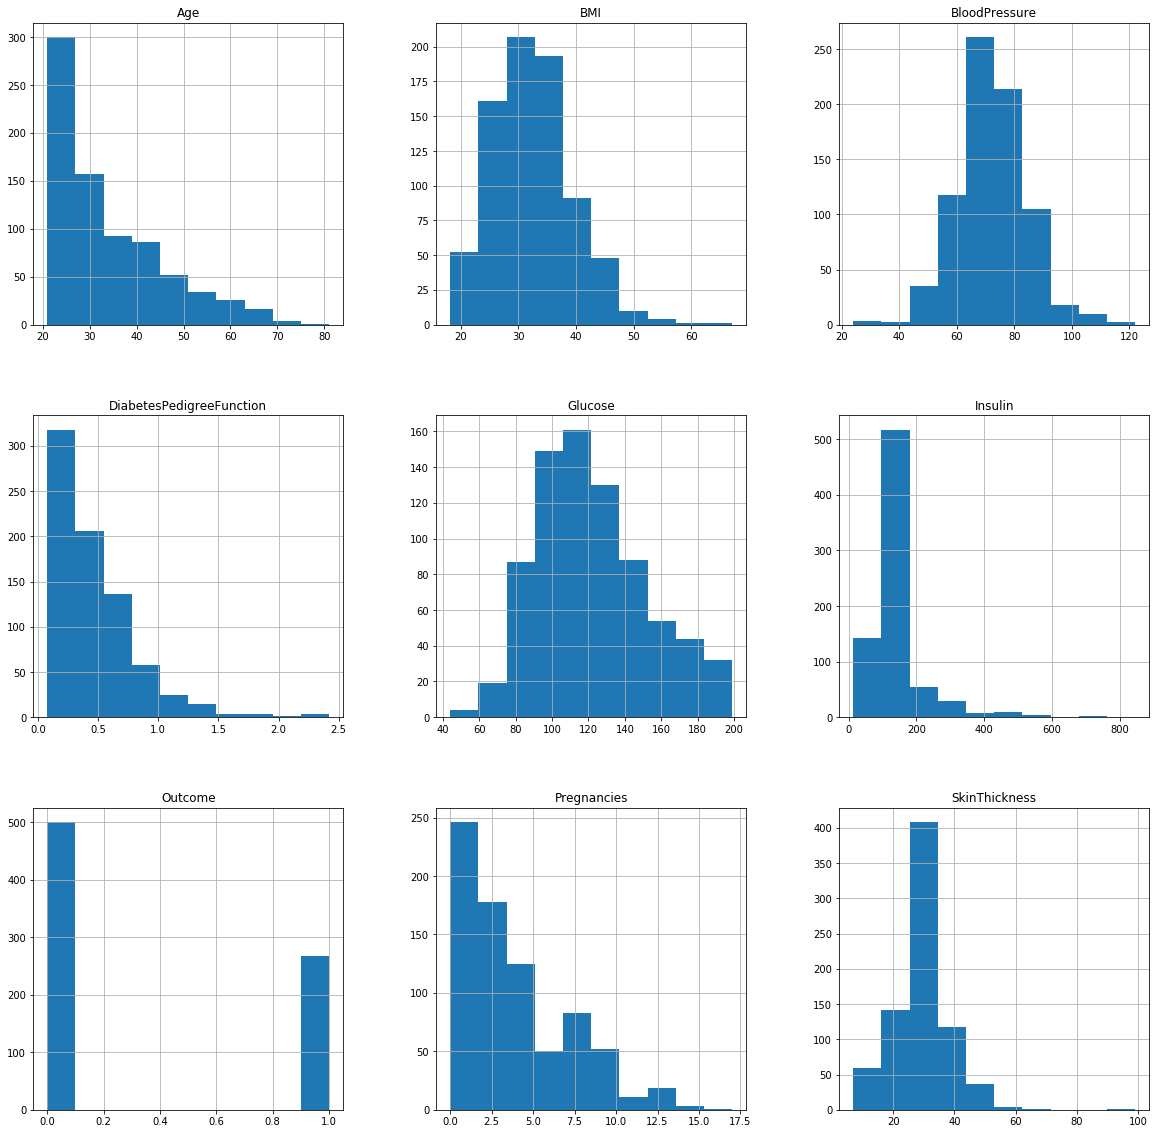

In [112]:
p=diabaties_data_copy.hist(figsize=(20,20))

In [113]:
diabaties_data_copy.shape

(768, 9)

In [114]:
X=diabaties_data_copy.iloc[:,:8]
y=diabaties_data_copy.iloc[:,8:]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [124]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

In [125]:
classifier=KNeighborsClassifier(n_neighbors=11)

In [126]:
classifier.fit(X_train,y_train)

C:\Users\Naman\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [127]:
y_prec=classifier.predict(X_test)

In [129]:
y_prec[:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [134]:
y[:10]

,Outcome
0,1
1,0
2,1
3,0
4,1
5,0
6,1
7,0
8,1
9,1


In [135]:
cm=confusion_matrix(y_test,y_prec)

In [136]:
print(cm)

#[[ True positive  ,  false positive                    ### these are predicted
# false nagative  ,   true negative     ]]              ### these are actual

[[134  34]
 [ 36  50]]


In [137]:
print(f1_score(y_test,y_prec))

0.5882352941176471


In [138]:
print((accuracy_score(y_test,y_prec)))

0.7244094488188977
